In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras


train_set = pd.read_csv('mnist_train.csv')
test_set = pd.read_csv('mnist_test.csv')

train_set.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [2]:
train_X, train_y = train_set.iloc[:,1:], train_set.iloc[:,0]
len(train_set)

60000

In [3]:
train_set.shape

(60000, 785)

In [4]:
train_X1 = train_X.values.reshape(train_X.shape[0], 28,28)
train_X.shape

(60000, 784)

In [5]:
test = test_set.values

2


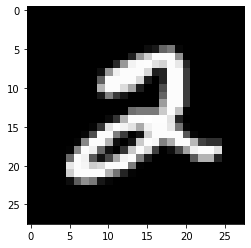

In [6]:
print(train_y[5])
plt.imshow(train_X1[5], cmap = 'gray')
plt.show()

In [7]:
train_X2 = train_X.values.reshape(train_X.shape[0], 28,28,1)
train_X2.shape

(60000, 28, 28, 1)

In [8]:
train_X3 = []
for i in range(train_X.shape[0]):
  train_X3.append(train_X2[i].reshape(28, 28))

np.array(train_X3).shape

(60000, 28, 28)

In [9]:
train_X3

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

Convert Train_y from 1D array to 2D Matrix

In [10]:
from tensorflow.keras.utils import to_categorical
train_y1 = to_categorical(train_y)
train_y1.shape

(60000, 10)

In [30]:
train_X3 = np.array(train_X3)
train_X3.shape

(60000, 28, 28)

CNN Arch.

In [21]:
from matplotlib.cbook import flatten
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten()) # convert 2D to 1D
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [23]:
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

In [27]:
history = model.fit(train_X3, train_y1, validation_split=0.2, batch_size=200, epochs=10)

Epoch 1/10
240/240 [==============================] - 41s 171ms/step - loss: 0.1693 - accuracy: 0.9497 - val_loss: 0.1487 - val_accuracy: 0.9562
Epoch 2/10
240/240 [==============================] - 38s 160ms/step - loss: 0.1332 - accuracy: 0.9586 - val_loss: 0.1173 - val_accuracy: 0.9652
Epoch 3/10
240/240 [==============================] - 38s 160ms/step - loss: 0.1107 - accuracy: 0.9661 - val_loss: 0.1159 - val_accuracy: 0.9663
Epoch 4/10
240/240 [==============================] - 46s 191ms/step - loss: 0.0970 - accuracy: 0.9694 - val_loss: 0.0967 - val_accuracy: 0.9707
Epoch 5/10
240/240 [==============================] - 41s 172ms/step - loss: 0.0859 - accuracy: 0.9726 - val_loss: 0.0863 - val_accuracy: 0.9742
Epoch 6/10
240/240 [==============================] - 38s 160ms/step - loss: 0.0784 - accuracy: 0.9755 - val_loss: 0.0789 - val_accuracy: 0.9764
Epoch 7/10
240/240 [==============================] - 38s 160ms/step - loss: 0.0694 - accuracy: 0.9779 - val_loss: 0.0805 - val_ac

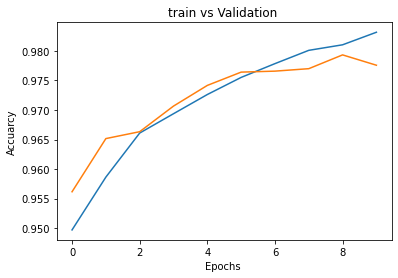

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("train vs Validation ")
plt.xlabel("Epochs ")
plt.ylabel("Accuarcy")
plt.show()

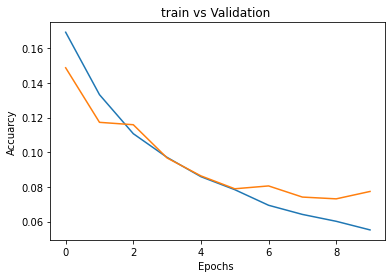

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("train vs Validation ")
plt.xlabel("Epochs ")
plt.ylabel("Accuarcy")
plt.show()